(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145            

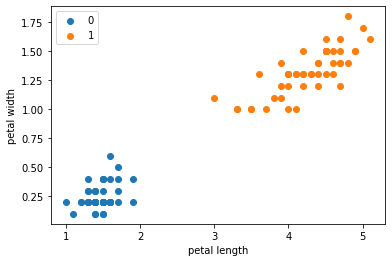

权重： 0.13999999999999987 0.8899999999999998
偏置： -0.7999999999999999


C:\Users\mg\AppData\Local\Temp\ipykernel_22588\314225702.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
C:\Users\mg\AppData\Local\Temp\ipykernel_22588\314225702.py:94: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label='1')


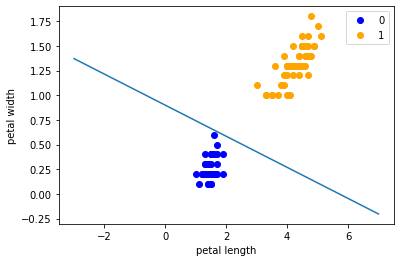

sklearn训练出的权重： [[0.9 1.7]]
sklearn训练出的偏置： [-3.]


C:\Users\mg\AppData\Local\Temp\ipykernel_22588\314225702.py:114: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
C:\Users\mg\AppData\Local\Temp\ipykernel_22588\314225702.py:115: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label='1')


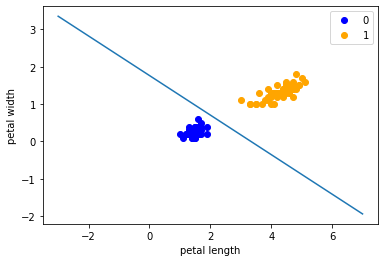

In [25]:
#利用鸢尾花数据来实现感知机算法

from sklearn import datasets

iris=datasets.load_iris()

print(iris.data.shape)
print(iris.data[:5])
print(iris.target.shape)
print(iris.target)

#------创建DataFrame，读取数据---------

import pandas as pd

df=pd.DataFrame(iris.data,columns=iris.feature_names) #数据集数量作为行、4个特征值作为列
df['label']=iris.target #增加标签列

print(df) #csv表

#------感知机实现--------

import numpy as np
import matplotlib.pyplot as plt



#选择2个特征值作为训练(两类各50个数据)
df.columns=['sepal length','sepal width','petal length','petal width','label']
plt.scatter(df[:50]['petal length'],df[:50]['petal width'],label='0')
plt.scatter(df[50:100]['petal length'],df[50:100]['petal width'],label='1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()


#取2、3列特征，0标签改为-1

data=np.array(df.iloc[:100,[2,3,-1]])#(行，[列数，自定义标签])
X=data[:,:-1]
y=data[:,-1]

y=np.array([1 if i==1 else -1 for i in y])

class Model():
    def __init__(self):
        #训练两个特征需要的权重参数，data为三列,第三列为标签
        self.w=np.ones(len(data[0])-1,dtype=np.float32)
        self.b=0
        self.l_rate=0.1#学习率
    
    def sign(self,x,w,b):
        y=np.dot(x,w)+b
        return y
    
    

    #使用随机梯度下降法
    def fit(self,X_train,y_train):
        is_wrong=False
        while not is_wrong:
            wrong_count=0
            for d in range(len(X_train)):
                X=X_train[d]
                y=y_train[d]
                #如果分类错误，就进行梯度更新
                if y*self.sign(X,self.w,self.b) <= 0:
                    self.w=self.w+self.l_rate*np.dot(y,X)
                    self.b=self.b+self.l_rate*y
                    wrong_count+=1
            
            if wrong_count==0:#全部分对，则停止更新
                is_wrong=True
        return 'Percetron Model'
    
    def score(self):
        pass

    
#拟合:获取参数w和b
perceptron=Model()
perceptron.fit(X,y)

print('权重：',perceptron.w[0],perceptron.w[1])
print('偏置：',perceptron.b)

#-------可视化拟合结果--------
x_points=np.linspace(-3,7,10)
y_=-(perceptron.w[0]*x_points+perceptron.b)/perceptron.w[1]
plt.plot(x_points,y_)#超平面

plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label='1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()
        

#---------使用sklearn构造感知机---------

from sklearn.linear_model import Perceptron

clf=Perceptron(fit_intercept=True,max_iter=100,shuffle=True)
clf.fit(X,y)

print('sklearn训练出的权重：',clf.coef_)
print('sklearn训练出的偏置：',clf.intercept_)

y_=-(clf.coef_[0][0]*x_points+clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color='orange',label='1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
        

        



最终的权重： [1 1]
最终的偏置： -3
第1次更新的权重为：[0 0],偏置为：0
第2次更新的权重为：[3 3],偏置为：1
第3次更新的权重为：[2 2],偏置为：0
第4次更新的权重为：[1 1],偏置为：-1
第5次更新的权重为：[0 0],偏置为：-2
第6次更新的权重为：[3 3],偏置为：-1
第7次更新的权重为：[2 2],偏置为：-2
第8次更新的权重为：[1 1],偏置为：-3


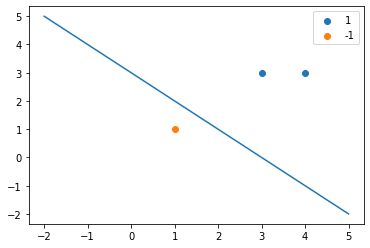

In [52]:
import numpy as np

x=np.array([[3,3],[4,3],[1,1]])

y=np.array([1,1,-1])

w=np.array([0,0])

b=0

l_rate=1


def sign(x,w,b):
    return np.dot(w,x)+b

is_wrong=False
w_all=[]
b_all=[]

w_all.append(w)
b_all.append(b)
while not is_wrong:
    wrong_count=0
    for d in range(len(x)):
        x_=x[d]
        y_=y[d]
        if y_*sign(x_,w,b)<=0:#判为误分类，则更新
            w=w+l_rate*np.dot(x_,y_)
            b=b+l_rate*y_
            wrong_count+=1
            #获取每次更新的w和b
            w_all.append(w)
            b_all.append(b)
    if wrong_count==0:
        is_wrong=True
    

print('最终的权重：',w)
print('最终的偏置：',b)

for i in range(len(w_all)):
    print('第{}次更新的权重为：{},偏置为：{}'.format(i+1,w_all[i],b_all[i]))
    
#-------显示结果---------------------
import matplotlib.pyplot as plt

plt.scatter(x[:-1,0],x[:-1,1],label='1')
plt.scatter(x[-1,0],x[-1,1],label='-1')

x_plt=np.linspace(-2,5,7)
y_plt=-(w[0]*x_plt+b)/w[1]

plt.plot(x_plt,y_plt)

plt.legend()


In [50]:
import numpy as np

y=[0,1,2,3,1]


res=zip(y,np.zeros(4,dtype=int))

l=dict(res)

print(l)

for k,v in l.items():
    l[k]+=1
    
print(l)

{0: 0, 1: 0, 2: 0, 3: 0}
{0: 1, 1: 1, 2: 1, 3: 1}


'C:\\Users\\mg\\Statistical_Learing_Method\\Perceptron'